In [1]:
# Writing a script for automatic data fetching
import os
import tarfile
from six.moves import urllib


In [2]:
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL=DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

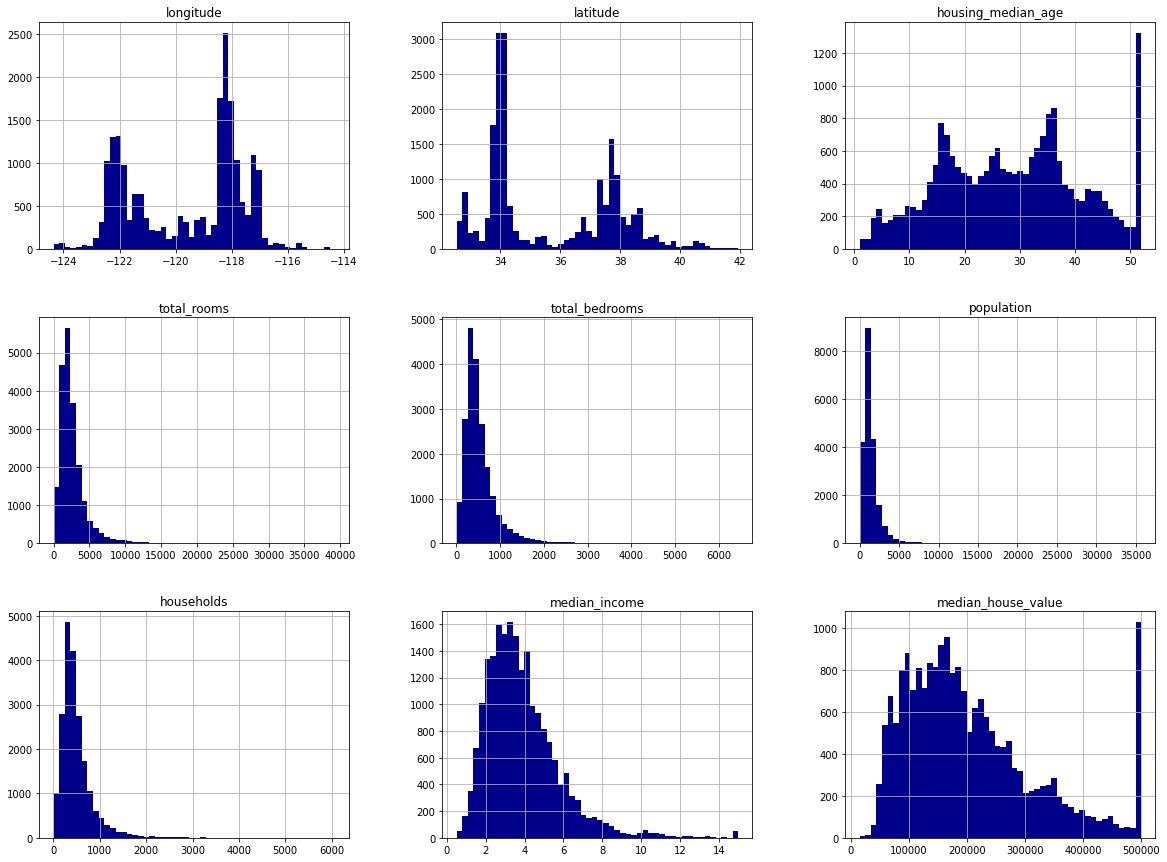

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
housing.hist(bins=50,color="darkblue", figsize=(20, 15))

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set,test_set=split_train_test(housing, 0.2)
# print(len(train_set), "train + ", len(test_set),"test")

In [12]:
#Creating hash of instance's identifier and putting instance in 
#test set if last byte of instance is lower or equal to 51

# import hashlib
# def test_set_check(identifier, test_ratio, hash):
#     return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

# def split_train_test_by_id(data, test_ratio. id_column, hash=hashlib.md5):
#     ids=data[id_colunmn]
#     in_test_set=ids.apply(lambda id_:test_set_check(id_, test_ratio, hash))
#     return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
# housing_with_id=housing.reset_index()
# train_set, test_set=split_tran_test_by_id(housing_with_id, 0.2, "index")

# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)


<AxesSubplot:>

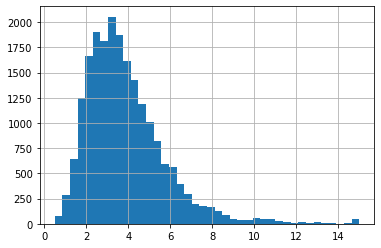

In [15]:
housing["median_income"].hist(bins=40)

In [16]:
housing['income_cat']=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [18]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [19]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [20]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

## Discovering and Visualizing the data to gain insights

In [21]:
housing=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

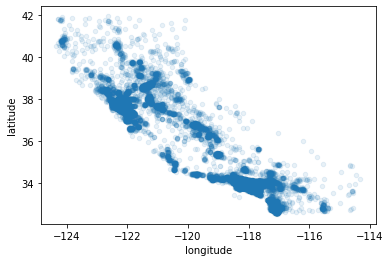

In [22]:
## Visualizing geaographical data
housing.plot(kind="scatter",x="longitude" , y="latitude", alpha=0.1 )

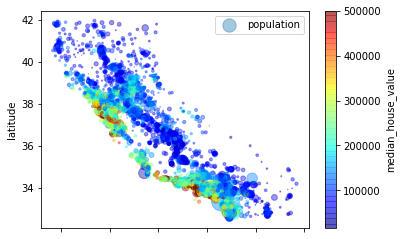

In [23]:
housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", c="median_house_value",
             cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [24]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

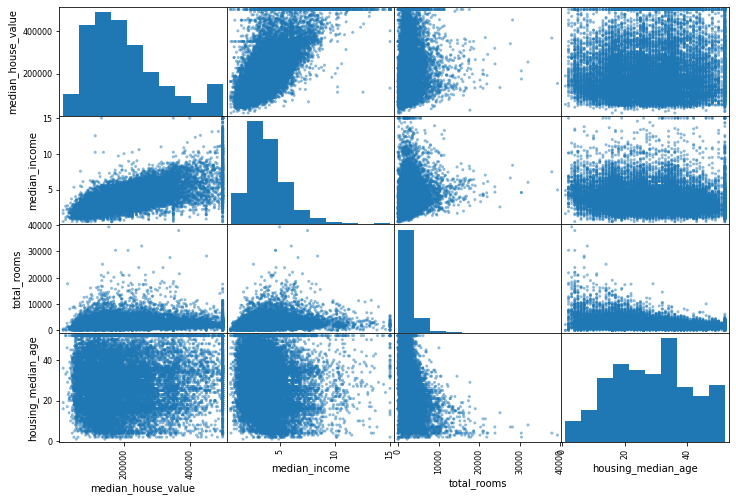

In [25]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

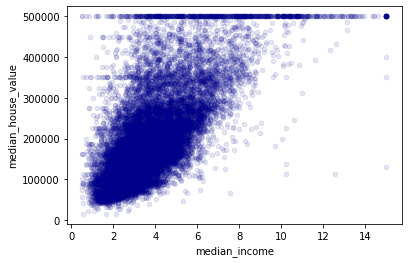

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1,c="darkblue")

## Experimenting with Attribute Combinations

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [28]:
housing["population_per_household"]=housing["population"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["households"]
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]


In [29]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_room          -0.043343
longitude                  -0.047432
latitude                   -0.142724
Name: median_house_value, dtype: float64

## Preparing data for ML algorithms

In [30]:
housing=strat_train_set.drop("median_house_value", axis=1)
housing_labels=strat_train_set["median_house_value"].copy()


### Data Cleaning

In [31]:
housing.dropna(subset=["total_bedrooms"])
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
Imputer=SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity", axis=1)
Imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
Imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
X=Imputer.transform(housing_num)
housing_tr=pd.DataFrame(X, columns=housing_num.columns)

### Handeling Text and Categorical data

In [35]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [36]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [37]:
# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder()
# housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
# housing_cat_1hot

In [38]:
# housing_cat_1hot.toarray()

In [39]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer(sparse_output=True)
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Custom Transformers

In [40]:
from sklearn.base import BaseEstimator , TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix=3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator , TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household=X[:, rooms_ix]/X[:,household_ix]
        population_per_household=X[:, population_ix]/X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder=CombinedAttributeAdder(add_bedrooms_per_room=False)
housind_extra_attribs=attr_adder.transform(housing.values)

In [41]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


###  Transformation Pipelines

In [42]:
#Pipeline of numerical attributes and categorical attributes

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
             self.attribute_names = attribute_names
                
    def fit(self, X, y=None):
         return self
        
    def transform(self, X):
        return X[self.attribute_names].values


#gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
    
    
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']


num_pipeline= Pipeline(
[
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler', StandardScaler()),
]
)
cat_pipeline= Pipeline(
[
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',MyLabelBinarizer()),
])

full_pipeline= FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])


housing_prepared=full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [43]:
housing_prepared.shape

(16512, 16)

### Selecting and Training Model

#### Training and Evaluating on training set

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [45]:

some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print('Prediction:\t', lin_reg.predict(some_data_prepared))

Prediction:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [46]:
print("Labels:\t", list(some_labels))

Labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [47]:
# Measuring Root Mean Square Error
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels, housing_predictions)

lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [48]:
# Training Decision Tree Regressor for better results

from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels, housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

## This is the case where model Overfits the data

0.0

#### Better Evaluation using cross validation

In [49]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores= np.sqrt(-scores)
#Scikit-Learn cross-validation features expect a utility function
#(greater is better) rather than a cost function (lower is better), so
#the scoring function is actually the opposite of the MSE 

In [50]:
def display_scores(scores):
    print('Scores :', scores)
    print("Mean :",scores.mean())
    print("standard deviation", scores.std())
    
display_scores(rmse_scores)


Scores : [68799.88037069 67765.10416623 70138.43565538 69294.87826677
 70957.77342201 74742.27701098 69765.35363325 70244.6439527
 76990.4432964  70787.73027356]
Mean : 70948.65200479643
standard deviation 2663.8364920094623


In [51]:
# Cross validation for linear model
lin_scores=cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean : 69052.46136345083
standard deviation 2731.6740017983498


In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels, housing_predictions)
forest_rmse=np.sqrt(forest_mse)
print(forest_rmse)

18604.56951692143


In [53]:
forest_scores=cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
print(display_scores(forest_rmse_scores))

Scores : [49237.65557821 47569.79393022 49896.4308027  51778.24868966
 49601.55485448 53657.9924691  48664.66486601 48086.38611428
 53360.15943731 50380.06799523]
Mean : 50223.29547371935
standard deviation 1989.5020844668195
None


In [54]:
import joblib
joblib.dump(forest_reg, "my_model.pkl")
my_model_loaded=joblib.load("my_model.pkl")

### Fune-Tune Your Model

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2,3,4]},
]

forest_reg=RandomForestRegressor()
grid_search= GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [57]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [64]:
cvres=grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_scores), params)

64229.12551868755 {'max_features': 2, 'n_estimators': 3}
55336.25877507999 {'max_features': 2, 'n_estimators': 10}
52891.61089028858 {'max_features': 2, 'n_estimators': 30}
60372.86832311039 {'max_features': 4, 'n_estimators': 3}
52516.08387935405 {'max_features': 4, 'n_estimators': 10}
50407.0093048966 {'max_features': 4, 'n_estimators': 30}
59320.21302193942 {'max_features': 6, 'n_estimators': 3}
52098.09312368445 {'max_features': 6, 'n_estimators': 10}
50007.55838694165 {'max_features': 6, 'n_estimators': 30}
58697.15313736952 {'max_features': 8, 'n_estimators': 3}
52243.43919564379 {'max_features': 8, 'n_estimators': 10}
50100.319537170915 {'max_features': 8, 'n_estimators': 30}
62653.12258628668 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54171.26635197949 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60742.90671659616 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52347.28379940416 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

#### Analyzing the best models and their errors


In [65]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([7.71685002e-02, 6.95304942e-02, 4.16695533e-02, 1.68845637e-02,
       1.68443013e-02, 1.77151795e-02, 1.56735901e-02, 3.37062725e-01,
       4.86550497e-02, 1.06490920e-01, 8.19239721e-02, 1.38405517e-02,
       1.45867994e-01, 7.26977049e-05, 3.59339319e-03, 7.00651472e-03])

In [68]:
extra_attribs=["rooms_per_hold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs=list(encoder.classes_)
attributes= num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3370627247686373, 'median_income'),
 (0.14586799375317652, 'INLAND'),
 (0.1064909201152226, 'pop_per_hhold'),
 (0.0819239721347999, 'bedrooms_per_room'),
 (0.07716850018091272, 'longitude'),
 (0.06953049416745648, 'latitude'),
 (0.048655049708156366, 'rooms_per_hold'),
 (0.041669553292769855, 'housing_median_age'),
 (0.01771517949534329, 'population'),
 (0.016884563694369196, 'total_rooms'),
 (0.016844301324929013, 'total_bedrooms'),
 (0.015673590050425446, 'households'),
 (0.013840551698729643, '<1H OCEAN'),
 (0.0070065147152936205, 'NEAR OCEAN'),
 (0.0035933931948769365, 'NEAR BAY'),
 (7.269770490116009e-05, 'ISLAND')]

### Evaluating System on test set

In [72]:
final_model=grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test= strat_test_set["median_house_value"].copy()
X_test_prepared= full_pipeline.transform(X_test)

final_predictions=final_model.predict(X_test_prepared)

final_mse= mean_squared_error(y_test, final_predictions)

final_rmse=np.sqrt(final_mse)
final_rmse

47556.47285826074